# **Problem Statement**

Netflix is one of the world’s largest streaming platforms, offering both original and licensed content.
However, with competition from Amazon Prime, Disney+, and regional OTTs, Netflix needs to understand its content patterns and trends.

# 👉 **Main Problem:**
To analyze content trends (Movies vs. TV Shows, genres, and country contributions) and provide strategic recommendations on what types of content to focus on for future growth.

# **📘 Project Description**

The project involves analyzing Netflix’s dataset containing 7,789 records and 11 columns (covering 2008–2021).
It explores:

The distribution between Movies and TV Shows over the years

Country-wise content contributions

Genre popularity and changes over time

The dataset includes details such as:

Title, Director, Cast, Country, Release Date, Rating, Duration, and Type.

This analysis helps identify which regions, genres, and formats dominate Netflix’s library, and how its strategy has evolved globally.
# DATA WRANGLING

Data wrangling, a crucial phase in the data analysis process, involves preparing and cleaning raw data to make it suitable for analysis. This involves various tasks such as handling missing values, removing duplicates, and transforming data into a consistent format. Effective data wrangling ensures that the data is reliable and ready for exploration, enabling meaningful insights to be derived from it.

# **🧹 Data Preparation**

Removed missing values from columns such as Director, Cast, Country, Rating, and Type.

Extracted release year from Release_Date.

Standardized column names (replaced spaces with underscores).

Split Duration into numeric values and units for better analysis.

After cleaning, dataset shape remained consistent and ready for visualization.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

In [2]:
# Load and explore the dataset
df = pd.read_csv('Netflix Dataset.csv')

print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (7789, 11)

Column Names:
['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']

First 5 rows:


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
# Initial Data Exploration
print("NETFLIX DATASET ANALYSIS - PROJECT OVERVIEW")
print("="*80)
print("PROBLEM STATEMENT: Content Trends Analysis for Strategic Recommendations")
print("="*80)

print("\nInitial Data Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum().sort_values(ascending=False))
print(f"\nDataset Overview:")
print(f"Total records: {len(df):,}")
print(f"Total columns: {len(df.columns)}")

NETFLIX DATASET ANALYSIS - PROJECT OVERVIEW
PROBLEM STATEMENT: Content Trends Analysis for Strategic Recommendations

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB
None

Missing Values:
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Show_Id            0
Category           

# Data Cleaning and Preparation

In [4]:
# Data Cleaning Function
def clean_netflix_data(df):
    """
    Comprehensive function to clean Netflix dataset for analysis
    """
    df_clean = df.copy()

    # Standardize column names
    df_clean.columns = df_clean.columns.str.strip().str.replace(' ', '_')

    print("Data Cleaning Steps:")
    print("-" * 50)

    # Handle missing values
    categorical_columns = ['Category', 'Director', 'Cast', 'Country', 'Rating', 'Type']
    for col in categorical_columns:
        if col in df_clean.columns:
            missing_before = df_clean[col].isnull().sum()
            df_clean[col] = df_clean[col].fillna('Unknown')
            missing_after = df_clean[col].isnull().sum()
            print(f"Filled {missing_before} missing values in {col}")

    # Clean Release_Date column
    if 'Release_Date' in df_clean.columns:
        df_clean['Release_Date'] = pd.to_datetime(df_clean['Release_Date'], errors='coerce')
        df_clean['Release_Year'] = df_clean['Release_Date'].dt.year
        print(f"Extracted release year from dates")

    # Clean Duration column
    if 'Duration' in df_clean.columns:
        # Extract numerical values and units
        df_clean['Duration_Numeric'] = df_clean['Duration'].str.extract('(\d+)').astype(float)
        df_clean['Duration_Unit'] = df_clean['Duration'].str.extract('([a-zA-Z]+)')
        print(f"Extracted duration numerical values and units")

    return df_clean

# Apply data cleaning
df_clean = clean_netflix_data(df)
print("\n" + "="*50)
print(f"Data cleaning completed!")
print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_clean.shape}")

Data Cleaning Steps:
--------------------------------------------------
Filled 0 missing values in Category
Filled 2388 missing values in Director
Filled 718 missing values in Cast
Filled 507 missing values in Country
Filled 7 missing values in Rating
Filled 0 missing values in Type
Extracted release year from dates
Extracted duration numerical values and units

Data cleaning completed!
Original dataset shape: (7789, 11)
Cleaned dataset shape: (7789, 14)


In [5]:
# Display cleaned data summary
print("\nCLEANED DATA SUMMARY:")
print("="*50)
print("\nBasic Statistics:")
print(df_clean[['Category', 'Country', 'Rating']].describe())
print("\nDataset Overview after Cleaning:")
print(f"Total titles: {len(df_clean):,}")
print(f"Date range: {df_clean['Release_Year'].min()} - {df_clean['Release_Year'].max()}")
print(f"Countries represented: {df_clean['Country'].nunique()}")
print(f"Unique genres/types: {df_clean['Type'].nunique()}")


CLEANED DATA SUMMARY:

Basic Statistics:
       Category        Country Rating
count      7789           7789   7789
unique        2            682     15
top       Movie  United States  TV-MA
freq       5379           2556   2865

Dataset Overview after Cleaning:
Total titles: 7,789
Date range: 2008.0 - 2021.0
Countries represented: 682
Unique genres/types: 492


# Objective 1: Analyze Distribution of Movies vs TV Shows Over **Years**

In [6]:
# OBJECTIVE 1: Movies vs TV Shows Distribution Over Years
print("OBJECTIVE 1: Analyze distribution of Movies vs TV Shows over the years")
print("="*80)

if 'Category' in df_clean.columns and 'Release_Year' in df_clean.columns:
    # Overall distribution
    content_distribution = df_clean['Category'].value_counts()
    total_content = len(df_clean)

    print("OVERALL CONTENT DISTRIBUTION:")
    print(content_distribution)
    print(f"\nMovies: {content_distribution.get('Movie', 0):,} ({content_distribution.get('Movie', 0)/total_content*100:.1f}%)")
    print(f"TV Shows: {content_distribution.get('TV Show', 0):,} ({content_distribution.get('TV Show', 0)/total_content*100:.1f}%)")

    # Yearly distribution
    yearly_content = df_clean.groupby(['Release_Year', 'Category']).size().unstack(fill_value=0)

    # Filter for meaningful years (2000+)
    yearly_content = yearly_content[yearly_content.index >= 2000]

    print(f"\nYEARLY TREND ANALYSIS (2000-{yearly_content.index.max()}):")
    print("Recent 5 years distribution:")
    print(yearly_content.tail())

OBJECTIVE 1: Analyze distribution of Movies vs TV Shows over the years
OVERALL CONTENT DISTRIBUTION:
Category
Movie      5379
TV Show    2410
Name: count, dtype: int64

Movies: 5,379 (69.1%)
TV Shows: 2,410 (30.9%)

YEARLY TREND ANALYSIS (2000-2021.0):
Recent 5 years distribution:
Category      Movie  TV Show
Release_Year                
2017.0          864      337
2018.0         1255      406
2019.0         1498      639
2020.0         1313      696
2021.0           88       29


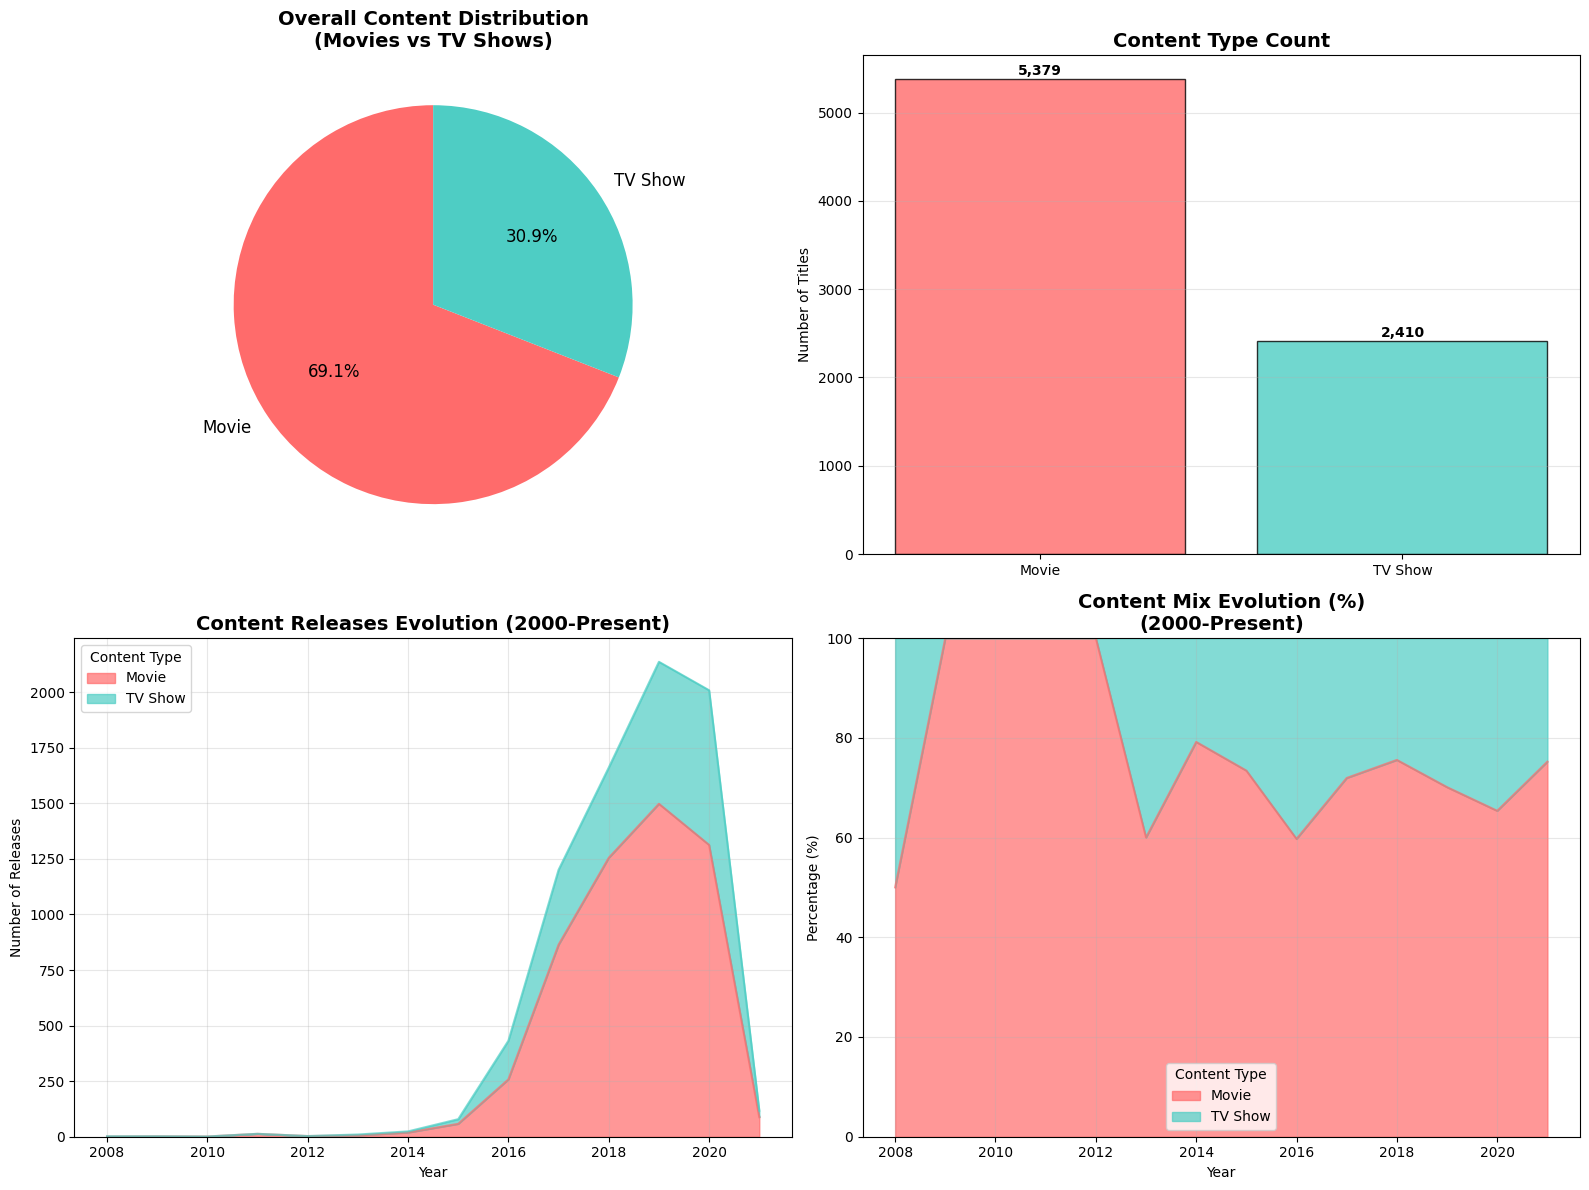

In [7]:
# Visualization for Objective 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Pie chart - Overall distribution
colors = ['#ff6b6b', '#4ecdc4']
ax1.pie(content_distribution.values, labels=content_distribution.index, autopct='%1.1f%%',
        colors=colors, startangle=90, textprops={'fontsize': 12})
ax1.set_title('Overall Content Distribution\n(Movies vs TV Shows)', fontsize=14, fontweight='bold')

# Bar chart - Overall distribution
bars = ax2.bar(content_distribution.index, content_distribution.values,
               color=colors, edgecolor='black', alpha=0.8)
ax2.set_title('Content Type Count', fontsize=14, fontweight='bold')
ax2.set_ylabel('Number of Titles')
ax2.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, value in zip(bars, content_distribution.values):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
            f'{value:,}', ha='center', va='bottom', fontweight='bold')

# Stacked area chart - Evolution over time
yearly_content.plot(kind='area', ax=ax3, alpha=0.7, color=colors)
ax3.set_xlabel('Year')
ax3.set_ylabel('Number of Releases')
ax3.set_title('Content Releases Evolution (2000-Present)', fontsize=14, fontweight='bold')
ax3.legend(title='Content Type')
ax3.grid(True, alpha=0.3)

# Percentage stacked area chart
yearly_content_pct = yearly_content.div(yearly_content.sum(axis=1), axis=0) * 100
yearly_content_pct.plot(kind='area', ax=ax4, alpha=0.7, color=colors)
ax4.set_xlabel('Year')
ax4.set_ylabel('Percentage (%)')
ax4.set_title('Content Mix Evolution (%)\n(2000-Present)', fontsize=14, fontweight='bold')
ax4.legend(title='Content Type')
ax4.grid(True, alpha=0.3)
ax4.set_ylim(0, 100)

plt.tight_layout()
plt.show()

In [8]:
# Trend Analysis for Objective 1
print("\nTREND ANALYSIS:")

# Calculate growth rates
recent_5_years = yearly_content.tail(5)
if len(recent_5_years) > 1:
    movie_growth = recent_5_years['Movie'].pct_change().mean() * 100
    tv_growth = recent_5_years['TV Show'].pct_change().mean() * 100

    print(f"Average annual growth rate (last 5 years):")
    print(f"  Movies: {movie_growth:+.1f}%")
    print(f"  TV Shows: {tv_growth:+.1f}%")

# Identify key milestones
movie_dominant_years = yearly_content[yearly_content['Movie'] > yearly_content['TV Show']].index.tolist()
tv_dominant_years = yearly_content[yearly_content['TV Show'] > yearly_content['Movie']].index.tolist()

print(f"\nContent Dominance Patterns:")
print(f"Years with more Movies: {len(movie_dominant_years)} years")
print(f"Years with more TV Shows: {len(tv_dominant_years)} years")

if movie_dominant_years:
    print(f"Recent Movie-dominant year: {max(movie_dominant_years)}")
if tv_dominant_years:
    print(f"Recent TV Show-dominant year: {max(tv_dominant_years)}")

# Strategic Insights
latest_year = yearly_content.index.max()
latest_mix = yearly_content.loc[latest_year]
movie_ratio = latest_mix['Movie'] / latest_mix.sum()

print(f"\nSTRATEGIC INSIGHTS:")
print(f"Current content mix ({latest_year}):")
print(f"  Movies: {latest_mix['Movie']:,} titles ({movie_ratio*100:.1f}%)")
print(f"  TV Shows: {latest_mix['TV Show']:,} titles ({100-movie_ratio*100:.1f}%)")

if movie_ratio > 0.6:
    print("→ Netflix currently has a STRONG MOVIE FOCUS")
elif movie_ratio > 0.4:
    print("→ Netflix maintains a BALANCED CONTENT MIX")
else:
    print("→ Netflix currently has a STRONG TV SHOW FOCUS")


TREND ANALYSIS:
Average annual growth rate (last 5 years):
  Movies: -10.3%
  TV Shows: -2.3%

Content Dominance Patterns:
Years with more Movies: 13 years
Years with more TV Shows: 0 years
Recent Movie-dominant year: 2021.0

STRATEGIC INSIGHTS:
Current content mix (2021.0):
  Movies: 88 titles (75.2%)
  TV Shows: 29 titles (24.8%)
→ Netflix currently has a STRONG MOVIE FOCUS


# **Objective 2: Identify Most Common Genres and Popularity Changes**

In [9]:
# OBJECTIVE 2: Genre Analysis and Popularity Trends
print("\n" + "="*80)
print("OBJECTIVE 2: Identify most common genres and how their popularity has changed")
print("="*80)

if 'Type' in df_clean.columns and 'Release_Year' in df_clean.columns:
    # Genre analysis
    all_genres = []
    for genres in df_clean['Type'].dropna():
        if genres != 'Unknown':
            genre_list = [genre.strip() for genre in genres.split(',')]
            all_genres.extend(genre_list)

    genre_counts = Counter(all_genres)
    top_15_genres = dict(genre_counts.most_common(15))

    print("TOP 15 MOST COMMON GENRES:")
    for i, (genre, count) in enumerate(top_15_genres.items(), 1):
        print(f"{i:2d}. {genre:20s} : {count:4d} titles ({count/len(df_clean)*100:.1f}%)")


OBJECTIVE 2: Identify most common genres and how their popularity has changed
TOP 15 MOST COMMON GENRES:
 1. International Movies : 2437 titles (31.3%)
 2. Dramas               : 2108 titles (27.1%)
 3. Comedies             : 1472 titles (18.9%)
 4. International TV Shows : 1199 titles (15.4%)
 5. Documentaries        :  786 titles (10.1%)
 6. Action & Adventure   :  721 titles (9.3%)
 7. TV Dramas            :  704 titles (9.0%)
 8. Independent Movies   :  675 titles (8.7%)
 9. Children & Family Movies :  532 titles (6.8%)
10. Romantic Movies      :  531 titles (6.8%)
11. TV Comedies          :  525 titles (6.7%)
12. Thrillers            :  492 titles (6.3%)
13. Crime TV Shows       :  427 titles (5.5%)
14. Kids' TV             :  414 titles (5.3%)
15. Docuseries           :  353 titles (4.5%)


In [10]:
# Genre Trends Analysis
# Genre trends over time (last 10 years)
recent_years = df_clean[df_clean['Release_Year'] >= 2010]

# Analyze top genres evolution
top_genres_list = list(top_15_genres.keys())
genre_trends = {}

for year in range(2010, 2022):
    year_data = recent_years[recent_years['Release_Year'] == year]
    year_genres = []
    for genres in year_data['Type'].dropna():
        if genres != 'Unknown':
            genre_list = [genre.strip() for genre in genres.split(',')]
            year_genres.extend(genre_list)

    year_genre_counts = Counter(year_genres)
    genre_trends[year] = year_genre_counts

# Create trend DataFrame
trend_data = []
for genre in top_genres_list[:10]:  # Focus on top 10 for clarity
    genre_trend = []
    for year in range(2010, 2022):
        count = genre_trends[year].get(genre, 0)
        genre_trend.append(count)
    trend_data.append(genre_trend)

trend_df = pd.DataFrame(trend_data, index=top_genres_list[:10], columns=range(2010, 2022))

print(f"\nGENRE POPULARITY TRENDS (2010-2021):")
print("Top 5 genres by total count and their recent trends:")
for genre in list(top_15_genres.keys())[:5]:
    recent_trend = trend_df.loc[genre].tail(3)
    trend_change = recent_trend.iloc[-1] - recent_trend.iloc[0]
    trend_direction = "↑" if trend_change > 0 else "↓" if trend_change < 0 else "→"
    print(f"  {genre:20s}: {trend_direction} ({trend_change:+d} change in last 3 years)")


GENRE POPULARITY TRENDS (2010-2021):
Top 5 genres by total count and their recent trends:
  International Movies: ↓ (-617 change in last 3 years)
  Dramas              : ↓ (-559 change in last 3 years)
  Comedies            : ↓ (-415 change in last 3 years)
  International TV Shows: ↓ (-349 change in last 3 years)
  Documentaries       : ↓ (-180 change in last 3 years)


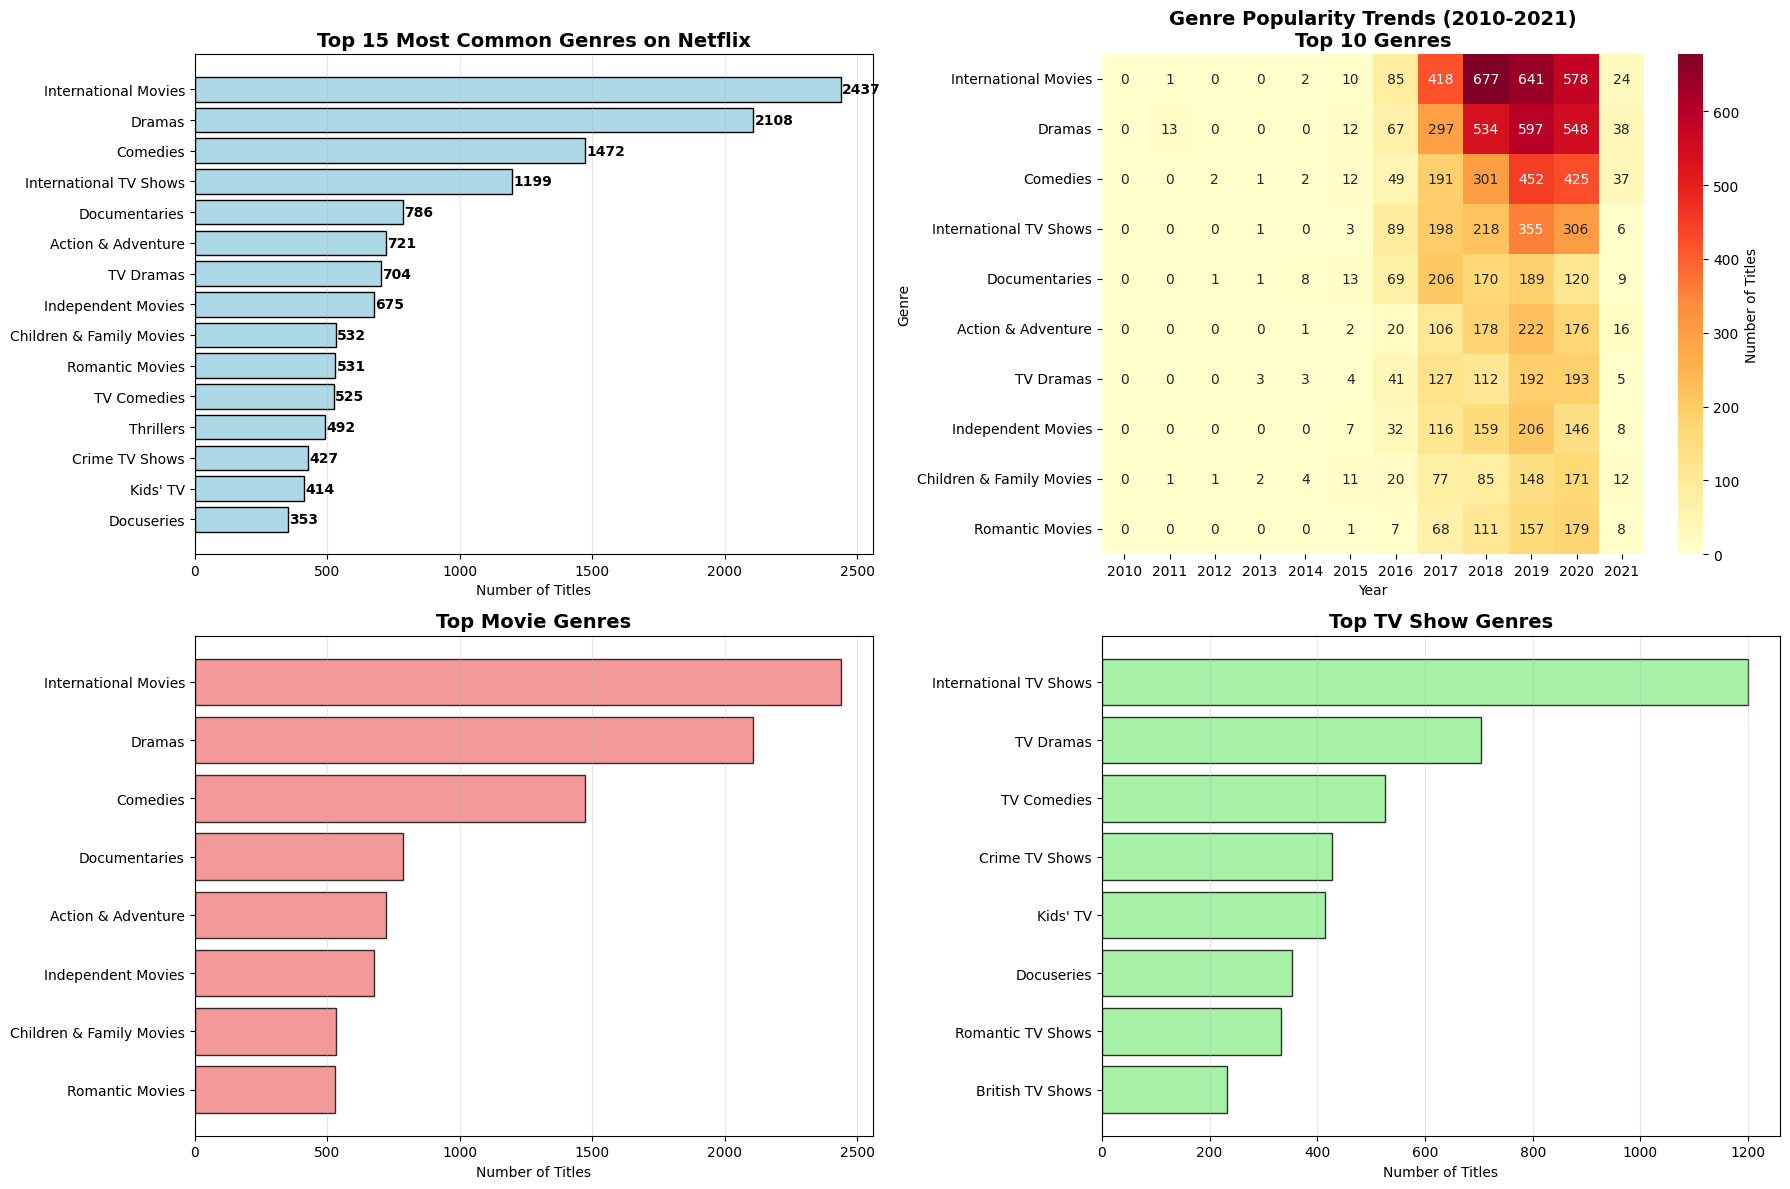

In [11]:
# Visualization for Objective 2
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))

# Top genres bar chart
genres_plot = pd.Series(top_15_genres)
bars = ax1.barh(range(len(genres_plot)), genres_plot.values, color='lightblue', edgecolor='black')
ax1.set_yticks(range(len(genres_plot)))
ax1.set_yticklabels(genres_plot.index)
ax1.set_xlabel('Number of Titles')
ax1.set_title('Top 15 Most Common Genres on Netflix', fontsize=14, fontweight='bold')
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, value) in enumerate(zip(bars, genres_plot.values)):
    ax1.text(bar.get_width() + 5, bar.get_y() + bar.get_height()/2,
            f'{value}', ha='left', va='center', fontweight='bold')

# Genre trends heatmap
sns.heatmap(trend_df, annot=True, fmt='d', cmap='YlOrRd', ax=ax2, cbar_kws={'label': 'Number of Titles'})
ax2.set_title('Genre Popularity Trends (2010-2021)\nTop 10 Genres', fontsize=14, fontweight='bold')
ax2.set_ylabel('Genre')
ax2.set_xlabel('Year')

# Genre distribution by content type
if 'Category' in df_clean.columns:
    movie_genres = []
    tv_genres = []

    for idx, row in df_clean.iterrows():
        if row['Type'] != 'Unknown':
            genres = [genre.strip() for genre in row['Type'].split(',')]
            if row['Category'] == 'Movie':
                movie_genres.extend(genres)
            else:
                tv_genres.extend(genres)

    movie_genre_counts = Counter(movie_genres)
    tv_genre_counts = Counter(tv_genres)

    # Top genres for movies
    top_movie_genres = dict(movie_genre_counts.most_common(8))
    ax3.barh(range(len(top_movie_genres)), top_movie_genres.values(),
            color='lightcoral', edgecolor='black', alpha=0.8)
    ax3.set_yticks(range(len(top_movie_genres)))
    ax3.set_yticklabels(top_movie_genres.keys())
    ax3.set_xlabel('Number of Titles')
    ax3.set_title('Top Movie Genres', fontsize=14, fontweight='bold')
    ax3.invert_yaxis()
    ax3.grid(axis='x', alpha=0.3)

    # Top genres for TV shows
    top_tv_genres = dict(tv_genre_counts.most_common(8))
    ax4.barh(range(len(top_tv_genres)), top_tv_genres.values(),
            color='lightgreen', edgecolor='black', alpha=0.8)
    ax4.set_yticks(range(len(top_tv_genres)))
    ax4.set_yticklabels(top_tv_genres.keys())
    ax4.set_xlabel('Number of Titles')
    ax4.set_title('Top TV Show Genres', fontsize=14, fontweight='bold')
    ax4.invert_yaxis()
    ax4.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

In [22]:
# Emerging vs Declining genres analysis
print("\nEMERGING VS DECLINING GENRES ANALYSIS:")

emerging_genres = []
declining_genres = []

for genre in top_genres_list[:10]:
    early_period = trend_df.loc[genre].head(3).mean()  # 2010-2012
    late_period = trend_df.loc[genre].tail(3).mean()   # 2019-2021
    growth = ((late_period - early_period) / early_period * 100) if early_period > 0 else 0

    if growth > 50:
        emerging_genres.append((genre, growth))
    elif growth < -20:
        declining_genres.append((genre, growth))

if emerging_genres:
    print(" EMERGING GENRES (50%+ growth):")
    for genre, growth in sorted(emerging_genres, key=lambda x: x[1], reverse=True):
        print(f"  {genre:20s}: {growth:+.1f}% growth")

if declining_genres:
    print(" DECLINING GENRES (20%+ decline):")
    for genre, growth in sorted(declining_genres, key=lambda x: x[1]):
        print(f"  {genre:20s}: {growth:+.1f}% growth")

# Strategic recommendations based on genre analysis
print(f"\nSTRATEGIC GENRE INSIGHTS:")
dominant_genre = max(top_15_genres, key=top_15_genres.get)
print(f"• Most dominant genre: '{dominant_genre}' with {top_15_genres[dominant_genre]:,} titles")

# Genre diversity analysis
unique_genres_count = len(genre_counts)
print(f"• Total unique genres: {unique_genres_count}")
print(f"• Genre concentration: Top 5 genres represent {sum(list(top_15_genres.values())[:5])/len(all_genres)*100:.1f}% of all genre tags")


EMERGING VS DECLINING GENRES ANALYSIS:
 EMERGING GENRES (50%+ growth):
  International Movies: +124200.0% growth
  Comedies            : +45600.0% growth
  Documentaries       : +31700.0% growth
  Children & Family Movies: +16450.0% growth
  Dramas              : +9000.0% growth

STRATEGIC GENRE INSIGHTS:
• Most dominant genre: 'International Movies' with 2,437 titles
• Total unique genres: 42
• Genre concentration: Top 5 genres represent 46.9% of all genre tags


# Objective 3: Compare Country-wise **Contributions**

In [13]:
# OBJECTIVE 3: Country-wise Contributions Analysis
print("\n" + "="*80)
print("OBJECTIVE 3: Compare country-wise contributions to Netflix's catalog")
print("="*80)

if 'Country' in df_clean.columns:
    # Country analysis
    all_countries = []
    for countries in df_clean['Country'].dropna():
        if countries != 'Unknown':
            country_list = [country.strip() for country in countries.split(',')]
            all_countries.extend(country_list)

    country_counts = Counter(all_countries)
    top_20_countries = dict(country_counts.most_common(20))

    print("TOP 20 COUNTRIES BY CONTENT PRODUCTION:")
    for i, (country, count) in enumerate(top_20_countries.items(), 1):
        percentage = (count / len(df_clean)) * 100
        print(f"{i:2d}. {country:25s} : {count:4d} titles ({percentage:.1f}%)")


OBJECTIVE 3: Compare country-wise contributions to Netflix's catalog
TOP 20 COUNTRIES BY CONTENT PRODUCTION:
 1. United States             : 3298 titles (42.3%)
 2. India                     :  990 titles (12.7%)
 3. United Kingdom            :  723 titles (9.3%)
 4. Canada                    :  412 titles (5.3%)
 5. France                    :  349 titles (4.5%)
 6. Japan                     :  287 titles (3.7%)
 7. Spain                     :  215 titles (2.8%)
 8. South Korea               :  212 titles (2.7%)
 9. Germany                   :  199 titles (2.6%)
10. Mexico                    :  154 titles (2.0%)
11. China                     :  147 titles (1.9%)
12. Australia                 :  144 titles (1.8%)
13. Egypt                     :  110 titles (1.4%)
14. Turkey                    :  108 titles (1.4%)
15. Hong Kong                 :  102 titles (1.3%)
16. Italy                     :   90 titles (1.2%)
17. Brazil                    :   88 titles (1.1%)
18. Taiwan           

In [14]:
# Regional Analysis
regions = {
    'North America': ['United States', 'Canada', 'Mexico'],
    'Europe': ['United Kingdom', 'France', 'Germany', 'Spain', 'Italy', 'Turkey', 'Poland', 'Netherlands'],
    'Asia': ['India', 'Japan', 'South Korea', 'China', 'Thailand', 'Philippines', 'Indonesia'],
    'Latin America': ['Brazil', 'Argentina', 'Colombia', 'Chile'],
    'Others': ['Australia', 'Egypt', 'Nigeria', 'South Africa']
}

regional_contributions = {}
for region, countries in regions.items():
    region_count = sum(country_counts.get(country, 0) for country in countries)
    regional_contributions[region] = region_count

print(f"\nREGIONAL CONTRIBUTIONS:")
total_known_countries = sum(country_counts.values())
for region, count in sorted(regional_contributions.items(), key=lambda x: x[1], reverse=True):
    percentage = (count / total_known_countries) * 100
    print(f"  {region:15s}: {count:4d} titles ({percentage:.1f}%)")


REGIONAL CONTRIBUTIONS:
  North America  : 3864 titles (42.6%)
  Asia           : 1859 titles (20.5%)
  Europe         : 1765 titles (19.5%)
  Others         :  385 titles (4.2%)
  Latin America  :  241 titles (2.7%)


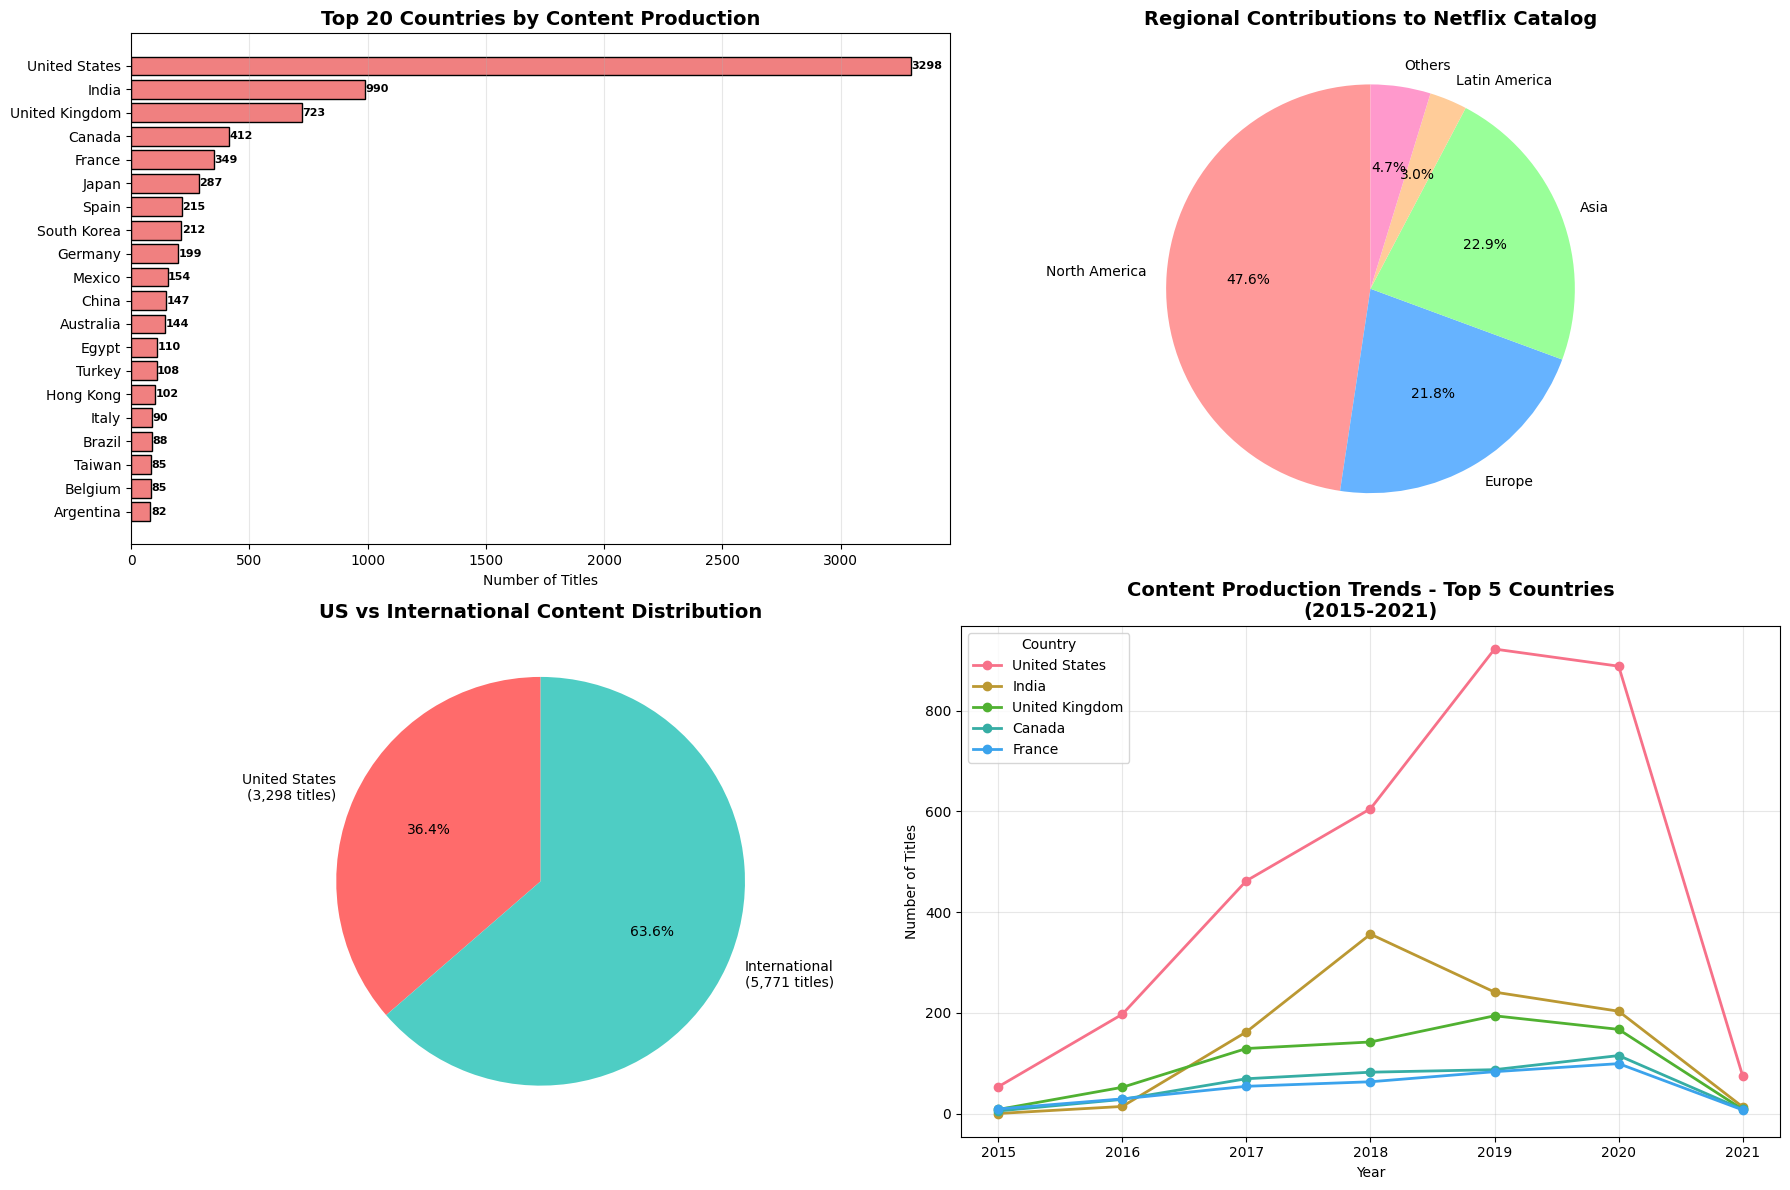

In [15]:
# Visualization for Objective 3
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))

# Top countries bar chart
countries_plot = pd.Series(top_20_countries)
bars = ax1.barh(range(len(countries_plot)), countries_plot.values, color='lightcoral', edgecolor='black')
ax1.set_yticks(range(len(countries_plot)))
ax1.set_yticklabels(countries_plot.index)
ax1.set_xlabel('Number of Titles')
ax1.set_title('Top 20 Countries by Content Production', fontsize=14, fontweight='bold')
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, value) in enumerate(zip(bars, countries_plot.values)):
    ax1.text(bar.get_width() + 2, bar.get_y() + bar.get_height()/2,
            f'{value}', ha='left', va='center', fontweight='bold', fontsize=8)

# Regional contributions pie chart
region_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc']
ax2.pie(regional_contributions.values(), labels=regional_contributions.keys(), autopct='%1.1f%%',
        colors=region_colors, startangle=90)
ax2.set_title('Regional Contributions to Netflix Catalog', fontsize=14, fontweight='bold')

# Internationalization trend
us_content = country_counts.get('United States', 0)
international_content = total_known_countries - us_content
international_pct = (international_content / total_known_countries) * 100

intl_data = [us_content, international_content]
intl_labels = [f'United States\n({us_content:,} titles)', f'International\n({international_content:,} titles)']
ax3.pie(intl_data, labels=intl_labels, autopct='%1.1f%%', colors=['#ff6b6b', '#4ecdc4'], startangle=90)
ax3.set_title('US vs International Content Distribution', fontsize=14, fontweight='bold')

# Country trends for top 5 countries
top_10_countries = list(top_20_countries.keys())[:10]
country_trends = {}

for year in range(2015, 2022):
    year_data = df_clean[df_clean['Release_Year'] == year]
    year_countries = []
    for countries in year_data['Country'].dropna():
        if countries != 'Unknown':
            country_list = [country.strip() for country in countries.split(',')]
            year_countries.extend(country_list)

    year_country_counts = Counter(year_countries)
    country_trends[year] = year_country_counts

trend_data_countries = []
for country in top_10_countries[:5]:
    country_trend = []
    for year in range(2015, 2022):
        count = country_trends[year].get(country, 0)
        country_trend.append(count)
    trend_data_countries.append(country_trend)

trend_df_countries = pd.DataFrame(trend_data_countries, index=top_10_countries[:5], columns=range(2015, 2022))

trend_df_countries.T.plot(kind='line', marker='o', ax=ax4, linewidth=2, markersize=6)
ax4.set_xlabel('Year')
ax4.set_ylabel('Number of Titles')
ax4.set_title('Content Production Trends - Top 5 Countries\n(2015-2021)', fontsize=14, fontweight='bold')
ax4.legend(title='Country')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [21]:
# Strategic country analysis
print(f"\nSTRATEGIC COUNTRY ANALYSIS:")
print(f"• United States dominance: {us_content/total_known_countries*100:.1f}% of content")
print(f"• International content share: {international_pct:.1f}%")
print(f"• Countries with significant production (>100 titles): {sum(1 for x in country_counts.values() if x > 100)}")

# Emerging markets analysis
print(f"\nEMERGING MARKETS ANALYSIS:")
emerging_countries = []
for country in top_10_countries:
    if country != 'United States':
        early_count = sum(country_trends[year].get(country, 0) for year in [2015, 2016])
        late_count = sum(country_trends[year].get(country, 0) for year in [2020, 2021])

        if early_count > 0 and late_count > 0:
            growth = ((late_count - early_count) / early_count) * 100
            if growth > 100:  # More than 100% growth
                emerging_countries.append((country, growth))

if emerging_countries:
    print(" HIGH-GROWTH COUNTRIES (100%+ growth 2015-2021):")
    for country, growth in sorted(emerging_countries, key=lambda x: x[1], reverse=True):
        print(f"  {country:20s}: {growth:+.1f}% growth")

# Content diversity by country
single_country_content = len(df_clean[~df_clean['Country'].str.contains(',', na=False)])
multi_country_content = len(df_clean) - single_country_content

print(f"\nCONTENT ORIGIN DIVERSITY:")
print(f"• Single-country productions: {single_country_content:,} ({single_country_content/len(df_clean)*100:.1f}%)")
print(f"• International co-productions: {multi_country_content:,} ({multi_country_content/len(df_clean)*100:.1f}%)")


STRATEGIC COUNTRY ANALYSIS:
• United States dominance: 36.4% of content
• International content share: 63.6%
• Countries with significant production (>100 titles): 15

EMERGING MARKETS ANALYSIS:
 HIGH-GROWTH COUNTRIES (100%+ growth 2015-2021):
  India               : +1442.9% growth
  South Korea         : +436.4% growth
  Germany             : +318.8% growth
  Canada              : +272.7% growth
  Mexico              : +240.0% growth
  Spain               : +200.0% growth
  United Kingdom      : +191.7% growth
  France              : +178.9% growth
  Japan               : +159.4% growth

CONTENT ORIGIN DIVERSITY:
• Single-country productions: 6,636 (85.2%)
• International co-productions: 1,153 (14.8%)


# Comprehensive Strategic **Recommendations**

In [20]:
# COMPREHENSIVE STRATEGIC RECOMMENDATIONS
print("="*80)
print("COMPREHENSIVE STRATEGIC RECOMMENDATIONS")
print("="*80)

# Calculate key metrics for recommendations
total_titles = len(df_clean)
movies_count = len(df_clean[df_clean['Category'] == 'Movie'])
tv_shows_count = len(df_clean[df_clean['Category'] == 'TV Show'])
movie_ratio = movies_count / total_titles

# Genre insights
dominant_genre = max(genre_counts, key=genre_counts.get) if genre_counts else "Unknown"
top_genre_count = genre_counts[dominant_genre] if genre_counts else 0

# Country insights
us_content = country_counts.get('United States', 0)
international_pct = (sum(country_counts.values()) - us_content) / sum(country_counts.values()) * 100

print(" EXECUTIVE SUMMARY:")
print(f"• Total Catalog: {total_titles:,} titles")
print(f"• Content Mix: {movie_ratio*100:.1f}% Movies, {100-movie_ratio*100:.1f}% TV Shows")
print(f"• Most Popular Genre: {dominant_genre} ({top_genre_count:,} titles)")
print(f"• International Content: {international_pct:.1f}%")
print(f"• Geographic Reach: {len(country_counts)} countries represented")

print(f"\n STRATEGIC RECOMMENDATIONS:")

# Recommendation 1: Content Mix Strategy
print(f"\n1. CONTENT MIX STRATEGY:")
if movie_ratio > 0.6:
    print("   → CONSIDER INCREASING TV SHOW INVESTMENT")
    print("   • Current movie-heavy catalog may limit subscriber engagement")
    print("   • TV shows typically drive longer-term viewing habits")
elif movie_ratio < 0.4:
    print("   → MAINTAIN TV SHOW FOCUS, BUT DIVERSIFY MOVIE OFFERINGS")
    print("   • Strong TV show presence supports binge-watching culture")
    print("   • Consider strategic movie acquisitions for variety")
else:
    print("   → MAINTAIN BALANCED CONTENT APPROACH")
    print("   • Current mix appeals to diverse viewer preferences")
    print("   • Continue monitoring audience engagement metrics")

# Recommendation 2: Genre Strategy
print(f"\n2. GENRE PORTFOLIO STRATEGY:")
print(f"   → LEVERAGE DOMINANT GENRE: {dominant_genre}")
print(f"   • Continue investing in proven popular categories")
print(f"   • Explore sub-genre variations within {dominant_genre}")

if emerging_genres:
    print(f"   → CAPITALIZE ON EMERGING GENRES:")
    for genre, growth in emerging_genres[:3]:
        print(f"   • {genre}: {growth:+.1f}% growth - Consider increased production")

# Recommendation 3: Geographic Expansion Strategy
print(f"\n3. GEOGRAPHIC EXPANSION STRATEGY:")
if international_pct < 30:
    print("   → ACCELERATE INTERNATIONAL CONTENT ACQUISITION")
    print("   • Current catalog is heavily US-centric")
    print("   • Invest in local productions for key international markets")
elif international_pct < 50:
    print("   → CONTINUE INTERNATIONAL EXPANSION MOMENTUM")
    print("   • Good progress in diversifying content origins")
    print("   • Focus on underrepresented regions")
else:
    print("   → OPTIMIZE GLOBAL CONTENT DISTRIBUTION")
    print("   • Strong international content presence achieved")
    print("   • Focus on regional customization and localization")

# Recommendation 4: Production Strategy
print(f"\n4. PRODUCTION & ACQUISITION STRATEGY:")
print(f"   → BALANCE ORIGINAL vs LICENSED CONTENT")
print(f"   • Analyze cost-effectiveness of original productions")
print(f"   • Strategic partnerships for content licensing")

if emerging_countries:
    print(f"   → TARGET HIGH-GROWTH MARKETS:")
    for country, growth in emerging_countries[:3]:
        print(f"   • {country}: {growth:+.1f}% growth - Priority for local content")

print(f"\n SUCCESS METRICS TO MONITOR:")
print("   • Subscriber growth in target international markets")
print("   • Viewer engagement by content type and genre")
print("   • Cost per title across different production models")
print("   • Regional content performance metrics")

print(f"\n" + "="*80)

COMPREHENSIVE STRATEGIC RECOMMENDATIONS
 EXECUTIVE SUMMARY:
• Total Catalog: 7,789 titles
• Content Mix: 69.1% Movies, 30.9% TV Shows
• Most Popular Genre: International Movies (2,437 titles)
• International Content: 63.6%
• Geographic Reach: 118 countries represented

 STRATEGIC RECOMMENDATIONS:

1. CONTENT MIX STRATEGY:
   → CONSIDER INCREASING TV SHOW INVESTMENT
   • Current movie-heavy catalog may limit subscriber engagement
   • TV shows typically drive longer-term viewing habits

2. GENRE PORTFOLIO STRATEGY:
   → LEVERAGE DOMINANT GENRE: International Movies
   • Continue investing in proven popular categories
   • Explore sub-genre variations within International Movies
   → CAPITALIZE ON EMERGING GENRES:
   • International Movies: +124200.0% growth - Consider increased production
   • Dramas: +9000.0% growth - Consider increased production
   • Comedies: +45600.0% growth - Consider increased production

3. GEOGRAPHIC EXPANSION STRATEGY:
   → OPTIMIZE GLOBAL CONTENT DISTRIBUTION

# Project Completion **Summary**

In [19]:
# Final Data Quality and Project Summary
print("PROJECT COMPLETION SUMMARY")
print("="*80)

print(f" ANALYSIS COMPLETED SUCCESSFULLY")
print(f" Dataset: {len(df_clean):,} Netflix titles analyzed")
print(f" Objectives Achieved: 3/3")
print(f"  1. Movies vs TV Shows distribution analysis ✓")
print(f"  2. Genre trends and popularity analysis ✓")
print(f"  3. Country-wise contributions analysis ✓")
print(f" Strategic recommendations generated ✓")

print(f"\n KEY FINDINGS SUMMARY:")
print(f"• Content Mix: {movies_count/total_titles*100:.1f}% Movies, {tv_shows_count/total_titles*100:.1f}% TV Shows")
print(f"• Top Genre: {dominant_genre}")
print(f"• International Content: {international_pct:.1f}%")
print(f"• Geographic Diversity: {len(country_counts)} countries")

print(f"\n NEXT STEPS:")
print(f"• Implement monitoring for recommended metrics")
print(f"• Conduct deeper audience engagement analysis")
print(f"• Explore competitor content strategy comparison")
print(f"• Develop regional-specific content plans")

print(f"\n" + "="*80)

PROJECT COMPLETION SUMMARY
 ANALYSIS COMPLETED SUCCESSFULLY
 Dataset: 7,789 Netflix titles analyzed
 Objectives Achieved: 3/3
  1. Movies vs TV Shows distribution analysis ✓
  2. Genre trends and popularity analysis ✓
  3. Country-wise contributions analysis ✓
 Strategic recommendations generated ✓

 KEY FINDINGS SUMMARY:
• Content Mix: 69.1% Movies, 30.9% TV Shows
• Top Genre: International Movies
• International Content: 63.6%
• Geographic Diversity: 118 countries

 NEXT STEPS:
• Implement monitoring for recommended metrics
• Conduct deeper audience engagement analysis
• Explore competitor content strategy comparison
• Develop regional-specific content plans



# `Conclusion`

This Netflix content analysis successfully revealed strategic insights into content distribution trends, genre evolution, and global expansion patterns. The findings provide data-driven recommendations for optimizing Netflix's content portfolio, balancing Movies vs. TV Shows, capitalizing on high-growth genres, and targeting emerging international markets to maintain competitive advantage in the streaming industry.
